# Communicate-Data-Finding-Explantory-with-Ford-GoBike-System-Data
## by (Mubarak Hamza)

## Introduction
I'll be analysing the Ford GoBike System Data : https://www.fordgobike.com/system-data.This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.Multiple data files will need to be joined together if a full year’s coverage is desired. The features included in the dataset:Trip Duration (seconds) , Start Time and Date , End Time and Date , Start Station ID , Start Station Name , Start Station Latitude , Start Station Longitude , End Station ID , End Station Name, End Station Latitude , End Station Longitude , Bike ID , User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual) , Member Year of Birth, Member Gender

## Preliminary Wrangling


In [479]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [480]:
df = pd.read_csv('201902-fordgobike-tripdata.txt')
df_ford = pd.DataFrame(df)
df_ford.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [481]:
df_ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [482]:
#make a copy of dataset to begin wrangling
df_ford_copy = df_ford.copy()

In [483]:
#dropping unwanted columns
df_ford_copy.drop(['start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)
df_ford_copy.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'end_station_id', 'end_station_name', 'bike_id',
       'user_type', 'member_birth_year', 'member_gender',
       'bike_share_for_all_trip'],
      dtype='object')

In [484]:
#Replace NaN values in member_birth_year column with mean values
df_ford_copy['member_birth_year'] = df_ford_copy['member_birth_year'].fillna(df_ford_copy['member_birth_year'].mean())
#Check for null values 
df_ford_copy['member_birth_year'].isnull().sum()

0

In [485]:
df_ford_copy['member_birth_year'].sample(15)          

91925     1990.0
163208    1987.0
79079     1994.0
59261     1985.0
66464     1981.0
3726      1964.0
145651    1998.0
106786    1957.0
162735    1973.0
81570     1992.0
69796     1974.0
8321      1991.0
35605     1990.0
122005    1989.0
45586     1999.0
Name: member_birth_year, dtype: float64

In [486]:
#Change datatpe of member_birth_year from float to int
df_ford_copy['member_birth_year'].astype('int')

0         1984
1         1984
2         1972
3         1989
4         1974
          ... 
183407    1996
183408    1984
183409    1990
183410    1988
183411    1989
Name: member_birth_year, Length: 183412, dtype: int32

In [487]:
print(df_ford_copy.shape)
print(df_ford_copy.dtypes)
df_ford_copy.head(2)

(183412, 12)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
end_station_id             float64
end_station_name            object
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.000000,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,1984.806437,NaN,No


In [488]:
#Convert start_time and end_time to datetime format
df_ford_copy['start_time'] = pd.to_datetime(df_ford_copy['start_time'])
df_ford_copy['end_time'] = pd.to_datetime(df_ford_copy['end_time'])
print(df_ford_copy.start_time.dtype, df_ford_copy.end_time.dtype)

datetime64[ns] datetime64[ns]


In [489]:
#Generate 'date' columns.
df_ford_copy['start_time_date'] = df_ford_copy['start_time'].dt.date
df_ford_copy['end_time_date'] = df_ford_copy['end_time'].dt.date

In [490]:
#Generate Trip Day and Hour column
df_ford_copy['Trip_day'] = df_ford_copy.start_time.dt.strftime('%A')
df_ford_copy['Trip_hour'] = df_ford_copy.start_time.dt.strftime('%H')

In [502]:
df_ford_copy.sample(10)

,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_date,end_time_date,Trip_day,Trip_hour,duration_min
62286,2019-02-20 17:06:32.159,2019-02-20 17:12:25.445,313.0,Almaden Blvd at San Fernando St,312.0,San Jose Diridon Station,1255,Subscriber,1976.0,Male,No,2019-02-20,2019-02-20,Wednesday,17,5.883333
104423,2019-02-14 08:37:54.440,2019-02-14 08:41:57.725,385.0,Woolsey St at Sacramento St,241.0,Ashby BART Station,4560,Subscriber,1983.0,Male,No,2019-02-14,2019-02-14,Thursday,08,4.050000
28327,2019-02-25 08:46:59.808,2019-02-25 08:54:51.884,50.0,2nd St at Townsend St,21.0,Montgomery St BART Station (Market St at 2nd St),5902,Subscriber,1984.0,Male,No,2019-02-25,2019-02-25,Monday,08,7.866667
132037,2019-02-09 09:35:11.227,2019-02-09 09:57:54.330,134.0,Valencia St at 24th St,24.0,Spear St at Folsom St,4755,Subscriber,1991.0,Male,Yes,2019-02-09,2019-02-09,Saturday,09,22.716667
109833,2019-02-12 18:28:23.371,2019-02-12 18:41:37.427,133.0,Valencia St at 22nd St,119.0,18th St at Noe St,2784,Subscriber,1963.0,Male,No,2019-02-12,2019-02-12,Tuesday,18,13.233333
18176,2019-02-26 19:13:45.836,2019-02-26 19:18:54.557,129.0,Harrison St at 20th St,109.0,17th St at Valencia St,6571,Subscriber,1992.0,Male,No,2019-02-26,2019-02-26,Tuesday,19,5.133333
14315,2019-02-27 12:38:03.360,2019-02-27 12:49:09.669,33.0,Golden Gate Ave at Hyde St,67.0,San Francisco Caltrain Station 2 (Townsend St...,4638,Subscriber,1985.0,Male,Yes,2019-02-27,2019-02-27,Wednesday,12,11.100000
32091,2019-02-24 15:00:00.457,2019-02-24 15:19:36.634,30.0,San Francisco Caltrain (Townsend St at 4th St),285.0,Webster St at O'Farrell St,6260,Subscriber,1994.0,Female,No,2019-02-24,2019-02-24,Sunday,15,19.600000
94852,2019-02-15 15:06:48.304,2019-02-15 15:50:04.358,239.0,Bancroft Way at Telegraph Ave,166.0,College Ave at Alcatraz Ave,6403,Subscriber,1990.0,Female,Yes,2019-02-15,2019-02-15,Friday,15,43.266667
159992,2019-02-05 17:27:43.412,2019-02-05 17:36:27.184,13.0,Commercial St at Montgomery St,47.0,4th St at Harrison St,5235,Subscriber,1981.0,Female,No,2019-02-05,2019-02-05,Tuesday,17,8.716667


### What is the structure of your dataset?

> Original Dataset consists of 16 Columns and 183412 Rows


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>  Trip Duration (seconds), Start Time and Date , End Time and Date, User Type , Member Year of Birth , Member Gender

## Univariate Exploration


> Question 1: How long does the average trip take?








Text(0.5, 0, 'duration in sec')

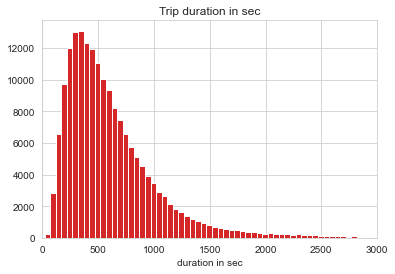

In [492]:
#plot  trip duration distribution
sb.set_style('whitegrid')
base_color = sb.color_palette()[3]
bins = np.arange(20, df_ford_copy['duration_sec'].max() + 50, 50)
plt.hist(data=df_ford_copy, x='duration_sec', bins=bins, color=base_color)
plt.xlim(0,3000)
plt.title('Trip duration in sec')
plt.xlabel('duration in sec')

Observation

>The graph above clearly shows its right skewed also edges a difficult to observe. I'll then convert the time duration to minutes by dividing duration_sec by 60. Also transforming it logarithimatically

Text(0.5, 0, 'Duration_minute')

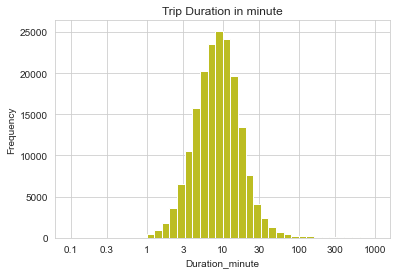

In [493]:
#Convert trip duation from seconds to minutes
df_ford_copy['duration_min'] = df_ford_copy['duration_sec'] / 60
df_ford_copy.drop('duration_sec' , axis = 1 , inplace = True)

base_color = sb.color_palette()[8]
bins = 10**np.arange(-1 , 3.0+0.1 , 0.1)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(val) for val in ticks]
plt.hist(data = df_ford_copy, x = 'duration_min' , bins = bins, color=base_color)
plt.xscale('log')
plt.xticks(ticks,labels)
plt.title('Trip Duration in minute')
plt.ylabel('Frequency')
plt.xlabel('Duration_minute')


Conclusion
> Based on the graph above, 10 Minutes ride is the time majority of the population spend.

Question 2: Which gender rides the most?

In [494]:
df_gender_trip = df_ford_copy.groupby('member_gender').agg({'bike_id':'count'})

In [495]:
df_gender_trip['perc'] = (df_gender_trip['bike_id']/df_gender_trip['bike_id'].sum())*100

(0.0, 100.0)

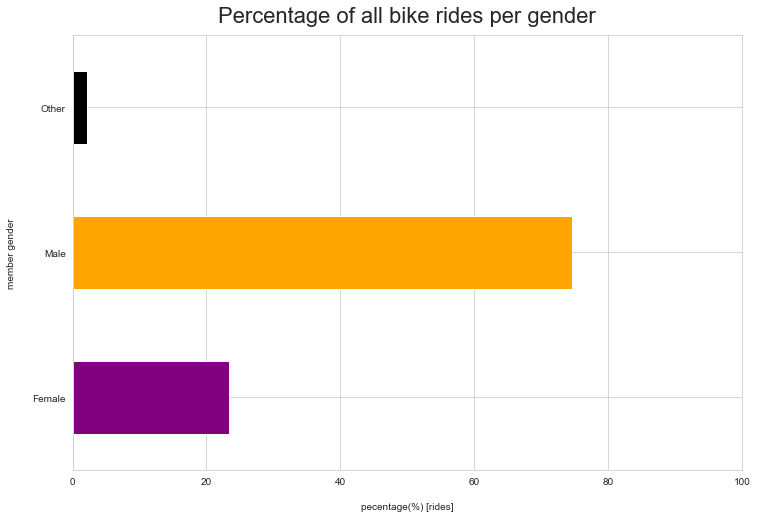

In [496]:
base_color = ['purple', 'orange', 'black']
df_gender_trip['perc'].plot(kind='barh', color=base_color, figsize=(12,8))
plt.title('Percentage of all bike rides per gender', fontsize=22, y=1.015)
plt.ylabel('member gender', labelpad=16)
plt.xlabel('pecentage(%) [rides]', labelpad=16)
plt.xticks(rotation=360)
plt.xlim(0,100)

Conclusion
> It clearly shows that males rides the most

Question 3: Which decade uses the most ford bikes

Text(0, 0.5, 'No of Bike Users')

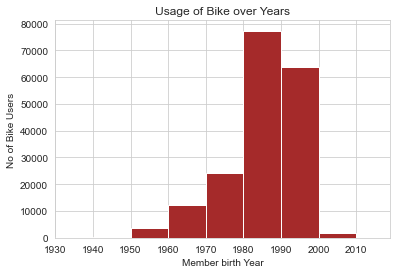

In [497]:
# I choose to plot the histogram to show the relationship between memeber_birth_year and No of Users.
bins = np.arange(10, df_ford_copy['member_birth_year'].max() + 10 , 10)
plt.hist(data = df_ford_copy, x = 'member_birth_year' , bins = bins, color='brown')
plt.xlim(1930,2019)
plt.title('Usage of Bike over Years')
plt.xlabel('Member birth Year')
plt.ylabel('No of Bike Users')

Conclusion
 > The population who have birth year between 1980 and 1990 uses the ford bike most

## Bivariate Exploration

Question 4: Average trip duration of subscribers vs customers

Text(0.5, 0, 'minutes [trip duration]')

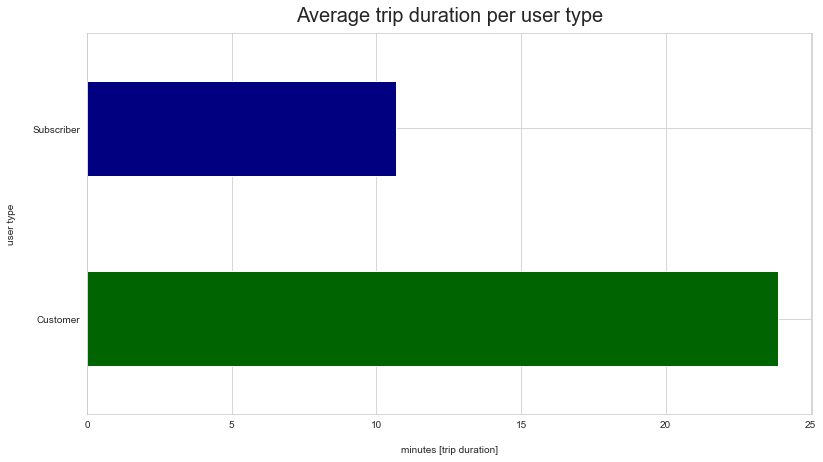

In [498]:
new_color=['darkgreen', 'navy']
ax = df_ford_copy.groupby('user_type')['duration_min'].mean().plot(kind='barh', color=new_color, figsize=(13,7))
ax.set_title('Average trip duration per user type', fontsize=20, y=1.015)
ax.set_ylabel('user type', labelpad=16)
ax.set_xlabel('minutes [trip duration]', labelpad=16)

Based on the plot above, customers average trip duration is around 28 minutes and more than subscribers average trip duration which is around 11 minutes.

Question 5: Finding the user type percentage split

In [499]:
#creating variable for customer and subscriber count
customer = df_ford_copy.query('user_type == "Customer"')['bike_id'].count()
subscriber = df_ford_copy.query('user_type == "Subscriber"')['bike_id'].count()

customer_prop = customer / df_ford_copy['bike_id'].count()
subscriber_prop = subscriber / df_ford_copy['bike_id'].count()

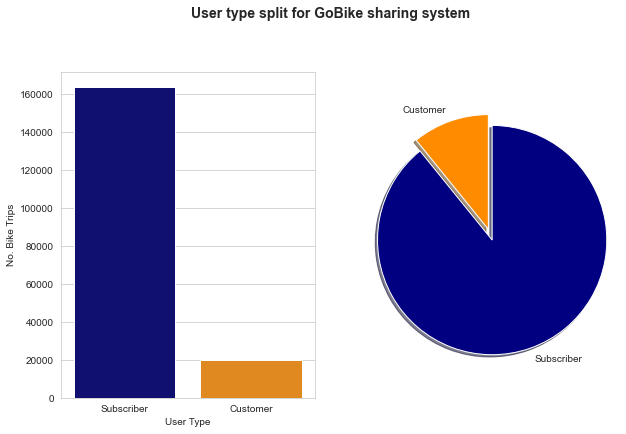

In [500]:
plt.figure(figsize=[10,6])

#first plot
plt.subplot(1,2,1)
g = sb.countplot(data=df_ford_copy, x='user_type', order=df_ford_copy.user_type.value_counts().index, palette = ['navy','darkorange'])
g.set_xlabel('User Type')
g.set_ylabel('No. Bike Trips')

#second plot
plt.subplot(1,2,2)
labels = ['Customer', 'Subscriber']
sizes = [customer_prop, subscriber_prop]
colors = ['darkorange', 'navy']
explode = (0, 0.1)

plt.pie(sizes,explode=explode, labels=labels, colors = colors, shadow=True, startangle=90)
plt.axis('equal')

plt.suptitle('User type split for GoBike sharing system', y=1.03, fontsize=14, fontweight='semibold');


Subscribers are way more than occasional users in this activity

## Multivariate Exploration

Now I'm adding gender to customer type for analysis.

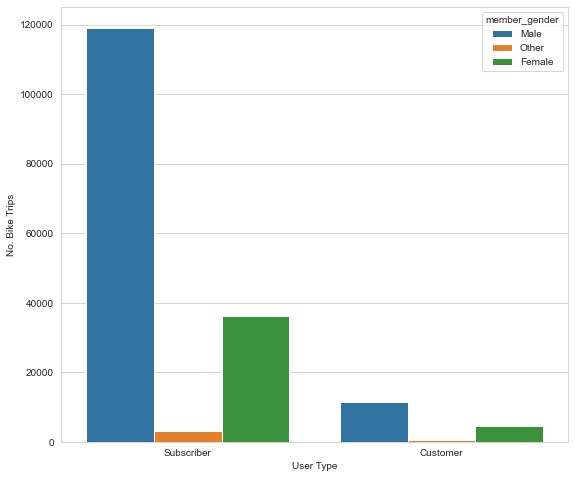

In [501]:
plt.figure(figsize=[20,8])

plt.subplot(1,2,1)
g = sb.countplot(data=df_ford_copy, x='user_type', hue='member_gender', order=df_ford_copy.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('No. Bike Trips');

we can see that men are participating in this activity more than women.

Which day of the week do subscribers and customers take the longest trips

Text(0, 0.5, 'Trip Duration in Mins')

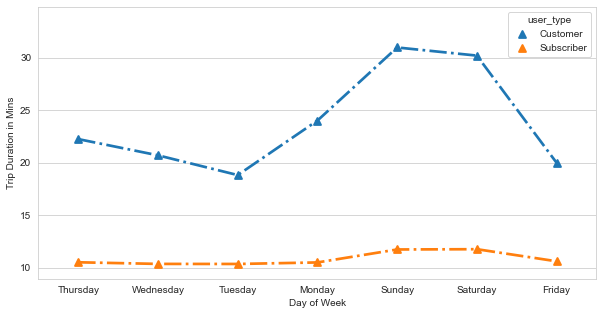

In [503]:
plt.figure(figsize=[10, 5])
sb.pointplot(data=df_ford_copy, x='Trip_day', y='duration_min', hue='user_type', errwidth=0, linestyles='-.'
             ,markers = '^')
plt.xlabel('Day of Week')
plt.ylabel('Trip Duration in Mins')

We notice:
> Both of Users type have a longer trip duration on weekend in relative to their trips during other week days.
> Subscribers rent bikes more efficiently as they have a shorter trip duration overall than customers.
> It looks like that customers rent bikes for entertainment and fun as they rent it for quite longer duration than subscribers specially on weekend days (Saturday and Sunday).

## Conclusions
Male took more bike rides than and females. People use this service on weekdays more than weekends. Percentage of subscribers is almost %88.15. Percentage of customers is almost %11.85. Subscribers' average trip duration is around 11 minutes. Customers' average trip duration is around 28 minutes. 90% of bike rides take place on weekday.